<a href="https://colab.research.google.com/github/Pedro-Prestes/learning/blob/master/Aula_001_S%C3%A9ries_Temporais_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
#@title
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [108]:
# importar pacotes e setar configurações de plots
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

%matplotlib inline

In [109]:
# url do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

# importar o csv para um dataframe
df = pd.read_csv(dataset_path)

# ver as 5 primeiras entradas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [110]:
# tipo de dados
type(df.DATE[0])

str

In [111]:
# [ANTES] converter tipo de coluna DATE em datetime
display(df.DATE.head())

0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [112]:
# [DEPOIS] converter tipo de coluna DATE em datetime
display(pd.to_datetime(df.DATE, format="%d-%m-%Y").head())

0   1985-01-01
1   1985-01-02
2   1985-01-03
3   1985-01-04
4   1985-01-05
Name: DATE, dtype: datetime64[ns]

In [113]:
# associar o index do dataframe
df.index = pd.to_datetime(df.DATE, format="%d-%m-%Y")

#eliminar a coluna DATE 
df.drop('DATE' , inplace=True,axis=1)

#ver as primeiras 5 entradas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151


**2.Visualizar Séries Temporais**

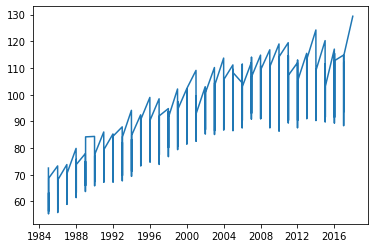

In [114]:
# plotar gráfico de consumo de eletricidade
plt.plot(df.index, df.Value);

3. Como Decompor um Time Séries em seus componentes

In [117]:
# salvar a decomposição em result
result = seasonal_decompose(df.index)

# plotar a decomposição

result.plot();

ValueError: ignored


4. **Análise Exploratória e Extração de Features**

Usaremos um dataset contendo os dados de uma suposta companhia ferroviária que utiliza uma nova tecnologia de propulsão.


In [121]:
ferroviaria_dataset = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

# importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

# ver as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


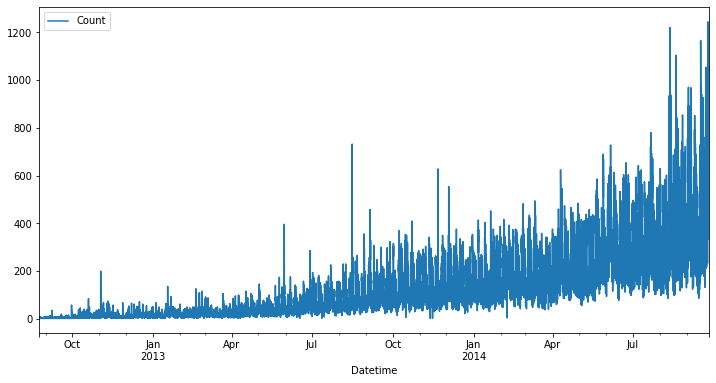

In [123]:
# converter a coluna Datetime em tipo datetime; 
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# plotar gráfico
fig, ax = plt.subplots(figsize=(12,6))
df_trem.plot(x='Datetime', y='Count', ax=ax);



Hipóteses:

    Pessoas viajam mais durante a semana.
    Há horários de pico por causa das indas e vindas do trabalho.
    Há períodos do mês onde a demanda por transporte é maior.



In [124]:
# criar features para cada período
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

In [125]:
# verificar as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [126]:
# converter as variáveis em 0 ou 1
df_trem['weekend'] = 0
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1

In [127]:
# verificar os valores final de semana x semana
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

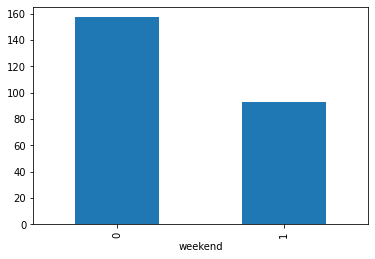

In [130]:
# plotar os valores final de semana x semana
df_trem.groupby('weekend').Count.mean().plot.bar();

Há horários de pico por causa das indas e vindas do trabalho.

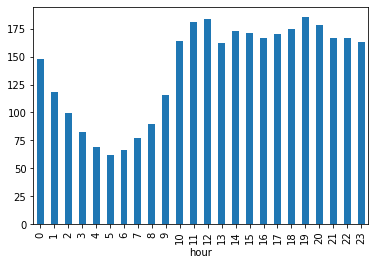

In [129]:
# plotar os valores em função do horário
df_trem.groupby('hour').Count.mean().plot.bar();

Há períodos do ano onde a demanda por transporte é maior.

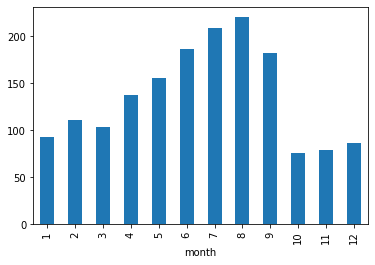

In [131]:
# plotar os valores em função dos meses
df_trem.groupby('month').Count.mean().plot.bar();